# Insurance Cost Analysis

# About the Dataset

| Parameter |Description| Content type |
|---|----|---|
|age| Age in years| integer |
|gender| Male or Female|integer (1 or 2)|
| bmi | Body mass index | float |
|no_of_children| Number of children | integer|
|smoker| Whether smoker or not | integer (0 or 1)|
|region| Which US region - NW, NE, SW, SE | integer (1,2,3 or 4 respectively)| 
|charges| Annual Insurance charges in USD | float|

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr

In [30]:
filepath = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/medical_insurance_dataset.csv'
df = pd.read_csv(filepath, header = None)

In [31]:
df.head(10)

,0,1,2,3,4,5,6
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520
5,31,1,25.740,0,?,4,3756.62160
6,46,1,33.440,1,0,4,8240.58960
7,37,1,27.740,3,0,1,7281.50560
8,37,2,29.830,2,0,2,6406.41070
9,60,1,25.840,0,0,1,28923.13692


In [32]:
headers_list = ['age','gender','bmi','no_of_children','smoker','region','charges']
df.columns = headers_list
df.head()

,age,gender,bmi,no_of_children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520


In [33]:
df.replace('?',np.nan, inplace=True)
df.head(10)

,age,gender,bmi,no_of_children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520
5,31,1,25.740,0,NaN,4,3756.62160
6,46,1,33.440,1,0,4,8240.58960
7,37,1,27.740,3,0,1,7281.50560
8,37,2,29.830,2,0,2,6406.41070
9,60,1,25.840,0,0,1,28923.13692


# Data Wrangling

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2768 non-null   object 
 1   gender          2772 non-null   int64  
 2   bmi             2772 non-null   float64
 3   no_of_children  2772 non-null   int64  
 4   smoker          2765 non-null   object 
 5   region          2772 non-null   int64  
 6   charges         2772 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB


In [35]:
# replacing NAN values in age column

age_mean = df['age'].astype('float').mean(axis = 0)
df['age'].replace(np.nan,age_mean, inplace=True)

# replacing NAN values in smoker column

smoker_mode = df['smoker'].value_counts().idxmax()
df['smoker'].replace(np.nan,smoker_mode, inplace=True)

# casting data types

df['age'] = df['age'].astype('int')
df['smoker'] = df['smoker'].astype('int')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2772 non-null   int64  
 1   gender          2772 non-null   int64  
 2   bmi             2772 non-null   float64
 3   no_of_children  2772 non-null   int64  
 4   smoker          2772 non-null   int64  
 5   region          2772 non-null   int64  
 6   charges         2772 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 151.7 KB


C:\Users\Surface Lapto 2 1769\AppData\Local\Temp\ipykernel_15876\3472724715.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].replace(np.nan,age_mean, inplace=True)
C:\Users\Surface Lapto 2 1769\AppData\Local\Temp\ipykernel_15876\3472724715.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

In [36]:
df['charges'] = df['charges'].round(2)
df['charges']

0       16884.92
1        1725.55
2        4449.46
3       21984.47
4        3866.86
          ...   
2767     8569.86
2768     2020.18
2769    16450.89
2770    21595.38
2771     9850.43
Name: charges, Length: 2772, dtype: float64

# Exploratory Data Analysis (EDA)

<Axes: xlabel='bmi', ylabel='charges'>

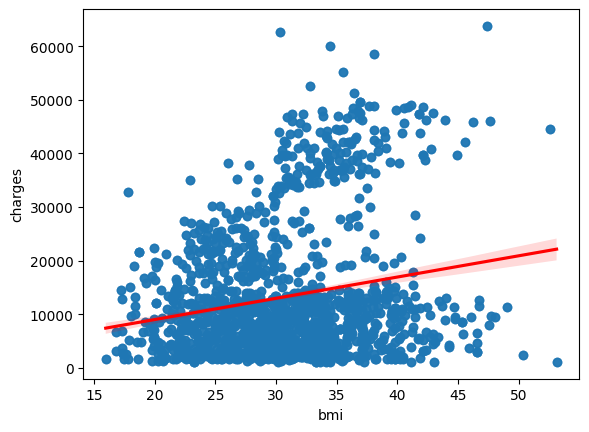

In [37]:
sns.regplot(data=df, x= 'bmi', y= 'charges',line_kws={"color": "red"})

<Axes: xlabel='smoker', ylabel='charges'>

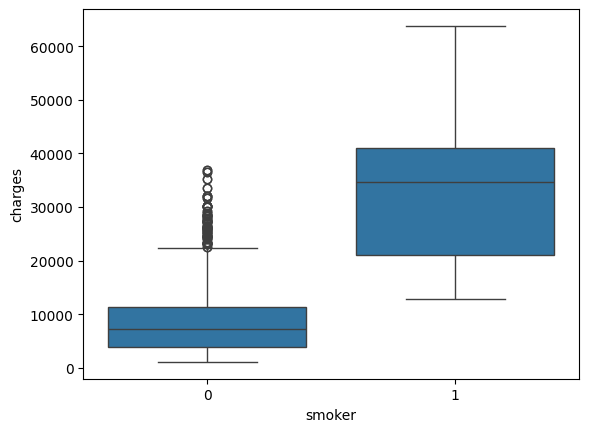

In [38]:
sns.boxplot(df ,x= 'smoker', y= 'charges')

In [39]:
df.corr()

,age,gender,bmi,no_of_children,smoker,region,charges
age,1.000000,-0.026046,0.113048,0.037574,-0.023286,-0.007167,0.298624
gender,-0.026046,1.000000,0.042924,0.016020,0.082326,0.022213,0.062837
bmi,0.113048,0.042924,1.000000,-0.001492,0.011489,0.271119,0.199846
no_of_children,0.037574,0.016020,-0.001492,1.000000,0.006362,-0.025717,0.066442
smoker,-0.023286,0.082326,0.011489,0.006362,1.000000,0.054077,0.788783
region,-0.007167,0.022213,0.271119,-0.025717,0.054077,1.000000,0.054058
charges,0.298624,0.062837,0.199846,0.066442,0.788783,0.054058,1.000000


In [72]:
for column in df.columns:
    pearson_coef, p_value = pearsonr(df['charges'],df[column])
    print(column)
    print('r = ',pearson_coef,'\np_value = ',p_value,'\n')

age
r =  0.29862366165523724 
p_value =  3.316085012011406e-58 

gender
r =  0.06283683634000764 
p_value =  0.000932542528397576 

bmi
r =  0.19984605168370884 
p_value =  2.2935191654788256e-26 

no_of_children
r =  0.06644232390285765 
p_value =  0.00046444766841148013 

smoker
r =  0.7887833500983769 
p_value =  0.0 

region
r =  0.05405753174160519 
p_value =  0.0044145082493905 

charges
r =  1.0 
p_value =  0.0 



# Model Development

### Single Regression Model

In [40]:
from sklearn.linear_model import LinearRegression

X = df[['smoker']]
Y = df['charges']
lr = LinearRegression()
lr.fit(X,Y)
smoker_score = lr.score(X,Y)

print('R^2 = ',smoker_score)

R^2 =  0.6221791733924185


<Axes: xlabel='smoker', ylabel='charges'>

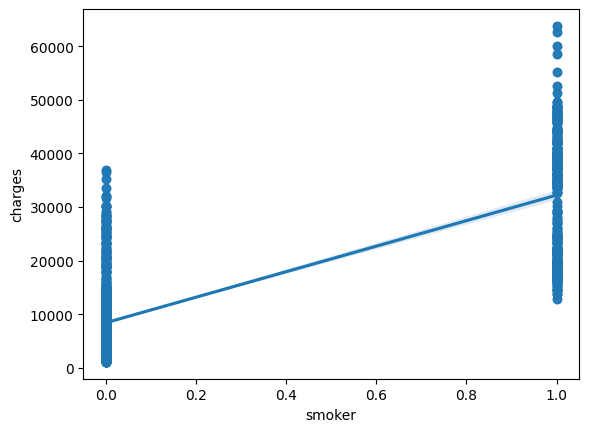

In [42]:
sns.regplot(df, x='smoker', y='charges')

### Multiple Regression Model

In [45]:
Z = df.drop(columns=['charges'])
lr = LinearRegression()
lr.fit(Z,Y)
m_yhat = lr.predict(Z)
z_score = lr.score(Z,Y)

print('R^2 = ',z_score,'\nMSE = ',mean_squared_error(m_yhat, Y))

R^2 =  0.7504083820289634 
MSE =  36842772.50180054


C:\Users\Surface Lapto 2 1769\AppData\Local\Temp\ipykernel_15876\2441274114.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(Y, hist=False, color='b', label='Actual Values')
C:\Users\Surface Lapto 2 1769\AppData\Local\Temp\ipykernel_15876\2441274114.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457

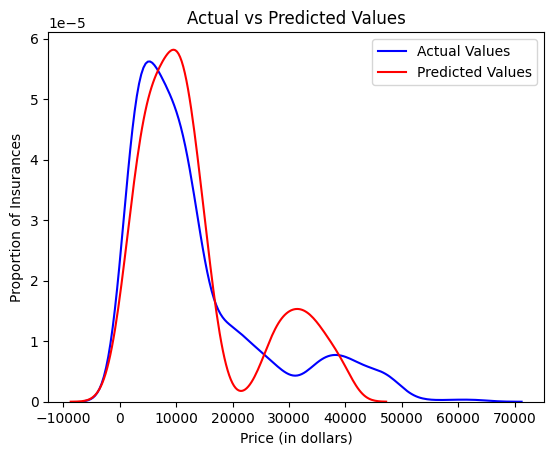

In [63]:
ax1 = sns.distplot(Y, hist=False, color='b', label='Actual Values')
sns.distplot(m_yhat, hist=False, color='r',label='Predicted Values', ax=ax1)

plt.title('Actual vs Predicted Values')
plt.legend(['Actual Values','Predicted Values'])
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Insurances')
plt.show()

### Polynomial Regression

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score

In [47]:
Input = [('scale',StandardScaler()),('polynomial',PolynomialFeatures(include_bias=False)),('model',LinearRegression())]
pipe = Pipeline(Input)
Z = Z.astype(float)
pipe.fit(Z,Y)
pipe_yhat = pipe.predict(Z)
z_poly_score = r2_score(Y, Ypipe)

print('R^2 = ',z_poly_score,'\nMSE = ',mean_squared_error(pipe_yhat, Y))

R^2 =  0.8452515297015821 
MSE =  22842765.04376782


C:\Users\Surface Lapto 2 1769\AppData\Local\Temp\ipykernel_15876\2441274114.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(Y, hist=False, color='b', label='Actual Values')
C:\Users\Surface Lapto 2 1769\AppData\Local\Temp\ipykernel_15876\2441274114.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457

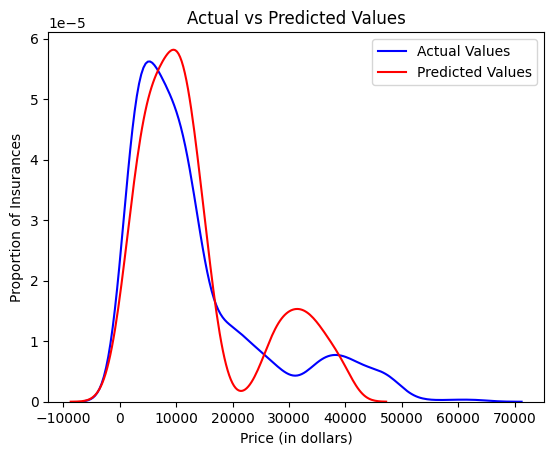

In [64]:
ax1 = sns.distplot(Y, hist=False, color='b', label='Actual Values')
sns.distplot(m_yhat, hist=False, color='r',label='Predicted Values', ax=ax1)

plt.title('Actual vs Predicted Values')
plt.legend(['Actual Values','Predicted Values'])
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Insurances')
plt.show()

# Model Refinement

In [49]:
from sklearn.model_selection import train_test_split
x_data = df.drop(columns=['charges'])
y_data = df['charges']
y_train,y_test,x_train,x_test = train_test_split(y_data, x_data, test_size=0.2, random_state = 0)

### Ridge Regression

In [55]:
from sklearn.linear_model import Ridge

RR = Ridge(alpha=0.1)
RR.fit(x_train,y_train)
rr_yhat = RR.predict(x_test)
rr_score = RR.score(x_test,y_test)

print('R^2 = ',rr_score,'\nMSE = ',mean_squared_error(rr_yhat, y_test))

R^2 =  0.7469894680059708 
MSE =  37706204.2477479


C:\Users\Surface Lapto 2 1769\AppData\Local\Temp\ipykernel_15876\2321166260.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_data, hist=False, color='b', label='Actual Values')
C:\Users\Surface Lapto 2 1769\AppData\Local\Temp\ipykernel_15876\2321166260.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed29

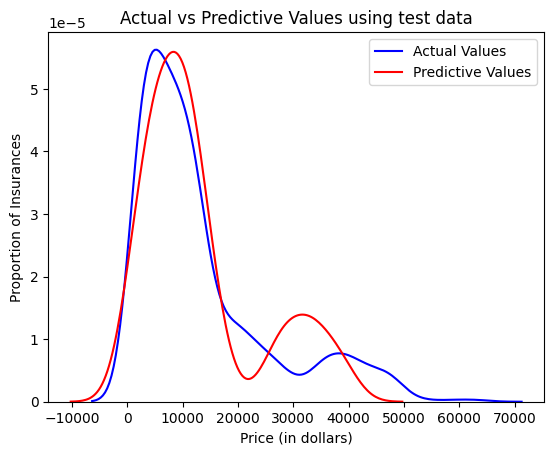

In [65]:
ax1 = sns.distplot(y_data, hist=False, color='b', label='Actual Values')
sns.distplot(rr_yhat, hist=False, color='r',label='Fitted Values', ax=ax1)

plt.title('Actual vs Predictive Values using test data')
plt.legend(['Actual Values','Predictive Values'])
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Insurances')
plt.show()

### Polynomial Regression

In [59]:
poly = PolynomialFeatures()
x_train_pr = poly.fit_transform(x_train)
x_test_pr = poly.fit_transform(x_test)

RR.fit(x_train_pr,y_train)
rr_poly_yhat = RR.predict(x_test_pr)
RR_poly_score = RR.score(x_test_pr, y_test)

print('R^2 = ',RR_poly_score,'\nMSE = ',mean_squared_error(rr_poly_yhat, y_test))

R^2 =  0.8410037679926489 
MSE =  23695236.52411818


C:\Users\Surface Lapto 2 1769\AppData\Local\Temp\ipykernel_15876\4129225261.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_data, hist=False, color='b', label='Actual Values')
C:\Users\Surface Lapto 2 1769\AppData\Local\Temp\ipykernel_15876\4129225261.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed29

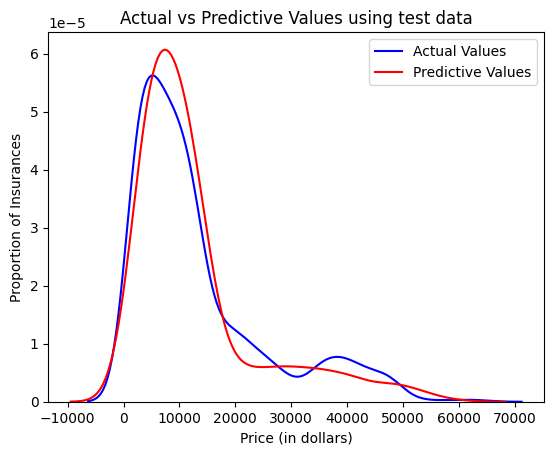

In [66]:
ax1 = sns.distplot(y_data, hist=False, color='b', label='Actual Values')
sns.distplot(rr_poly_yhat, hist=False, color='r',label='Fitted Values', ax=ax1)

plt.title('Actual vs Predictive Values using test data')
plt.legend(['Actual Values','Predictive Values'])
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Insurances')
plt.show()